In [ ]:
import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/build/python')
import pyRMatrix
print(pyRMatrix.__file__)

## Parameter Sensitivity Analysis
Compute numerical derivatives of cross sections with respect to all resonance parameters.
len(sensitivity_matrix['capture']) gives the number of params for each energies the sens have been computed at.

Parameters available for sensitivity analysis:

Computing sensitivity at 1.0 eV...


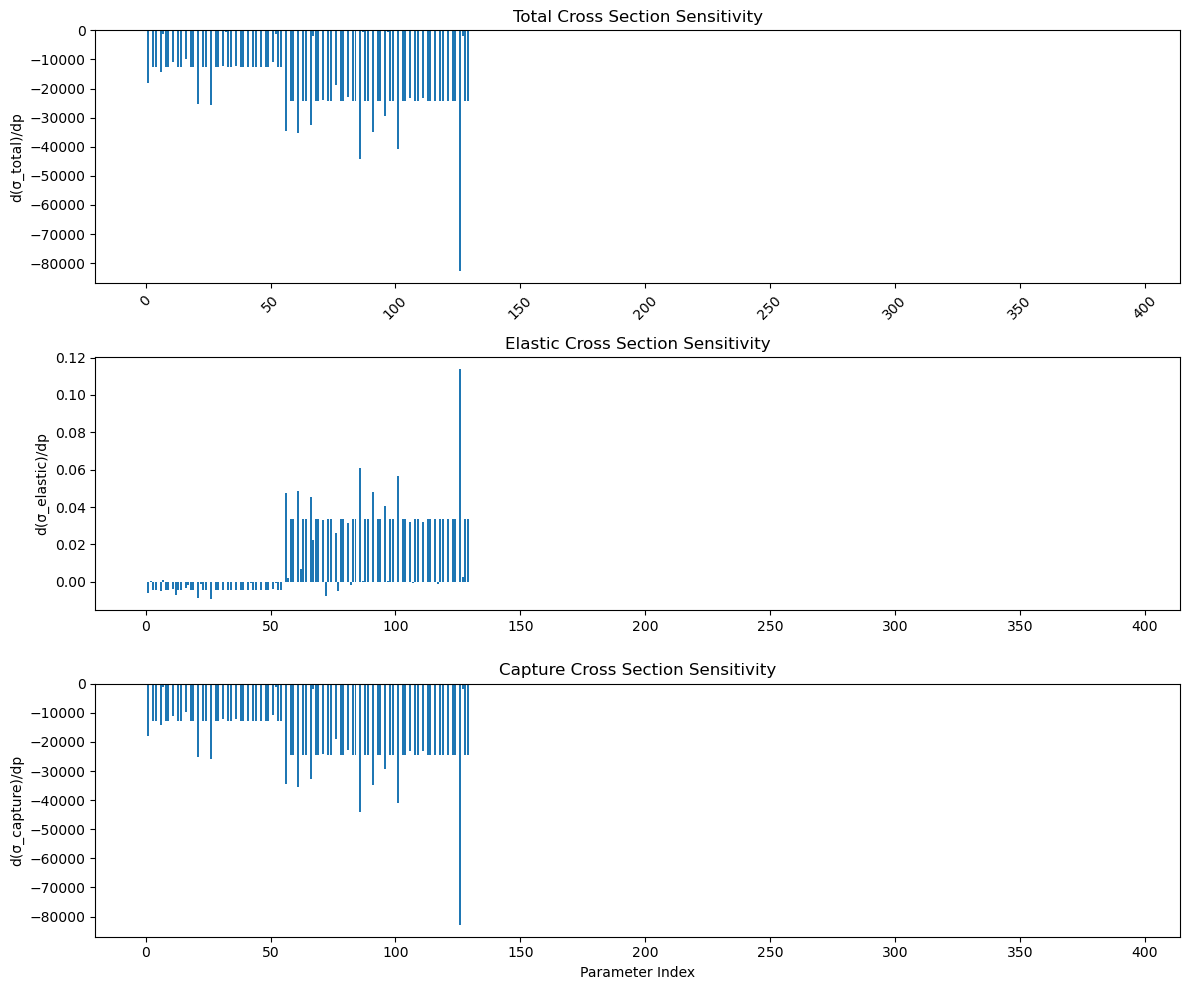

Computed sensitivity matrix for 50 energies and 395 parameters


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the compound system
tapename = '/home/sole-pie01/ndlib/jeff-40/13-Al-27g.txt'
compound_system = create_compound_from_ReichMoore(tapename)

# Create sensitivity analyzer
sensitivity = pyRMatrix.ParameterSensitivity(compound_system, perturbation=1e-6)

# Print parameter information
print("Parameters available for sensitivity analysis:")
sensitivity.printParameterInfo()

# Compute derivatives at specific energy
energy = 1.0  # eV
print(f"\nComputing sensitivity at {energy} eV...")

# Get derivatives for different cross section types
total_derivatives = sensitivity.totalCrossSectionDerivatives(energy)
elastic_derivatives = sensitivity.elasticCrossSectionDerivatives(energy)
capture_derivatives = sensitivity.captureCrossSectionDerivatives(energy)

# Get parameter info for plotting
parameters = sensitivity.getParameters()
param_names = [param.description for param in parameters]

# Plot sensitivity analysis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Total cross section derivatives
ax1.bar(range(len(total_derivatives)), total_derivatives)
ax1.set_title('Total Cross Section Sensitivity')
ax1.set_ylabel('d(σ_total)/dp')
ax1.tick_params(axis='x', rotation=45)

# Elastic cross section derivatives
ax2.bar(range(len(elastic_derivatives)), elastic_derivatives)
ax2.set_title('Elastic Cross Section Sensitivity')
ax2.set_ylabel('d(σ_elastic)/dp')

# Capture cross section derivatives
ax3.bar(range(len(capture_derivatives)), capture_derivatives)
ax3.set_title('Capture Cross Section Sensitivity')
ax3.set_ylabel('d(σ_capture)/dp')
ax3.set_xlabel('Parameter Index')

plt.tight_layout()
plt.show()

# Compute sensitivity matrix over energy range
energies = np.logspace(-2, 2, 50)  # 0.01 to 100 eV
sensitivity_matrix = sensitivity.computeSensitivityMatrix(energies.tolist())

print(f"Computed sensitivity matrix for {len(energies)} energies and {sensitivity.getParameterCount()} parameters")

In [ ]:
# Advanced sensitivity analysis: identify most sensitive parameters
energy = 1.0
derivatives = sensitivity.totalCrossSectionDerivatives(energy)
parameters = sensitivity.getParameters()

# Sort by absolute sensitivity
param_sensitivity = [(i, abs(deriv), param.description) for i, (deriv, param) in enumerate(zip(derivatives, parameters))]
param_sensitivity.sort(key=lambda x: x[1], reverse=True)

print("Top 10 most sensitive parameters for total cross section:")
print("Rank | Index | Sensitivity | Description")
print("-" * 50)
for rank, (idx, sens, desc) in enumerate(param_sensitivity[:10]):
    print(f"{rank+1:4d} | {idx:5d} | {sens:11.2e} | {desc}")

Top 10 most sensitive parameters for total cross section:
Rank | Index | Sensitivity | Description
--------------------------------------------------
   1 |   126 |    8.28e+04 | SG1_RES14_GAMMA0
   2 |    86 |    4.41e+04 | SG1_RES6_GAMMA0
   3 |   101 |    4.09e+04 | SG1_RES9_GAMMA0
   4 |    61 |    3.54e+04 | SG1_RES1_GAMMA0
   5 |    91 |    3.48e+04 | SG1_RES7_GAMMA0
   6 |    56 |    3.45e+04 | SG1_RES0_GAMMA0
   7 |    66 |    3.27e+04 | SG1_RES2_GAMMA0
   8 |    96 |    2.94e+04 | SG1_RES8_GAMMA0
   9 |    26 |    2.57e+04 | SG0_RES5_GAMMA0
  10 |    21 |    2.53e+04 | SG0_RES4_GAMMA0
